<h1> Assignment 3</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: Friday, 5th of April 2019, by 23:59 </li>
    <li>**Hand-In Format**: as jupyter notebook (run once through) AND printed as PDF via e-class. The naming format shold be your studentId_Assignment3.filetype (pdf or ipynb).</li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
<h2>Topics Covered: </h2>
<ul>
    This lab covers optimization of black box problems. <br />
    The algorithms explored in this assignment are Random Search, Grid Search, Particle Swarm Optimization as well as a meta-heuristic algorithm of your choosing.<br />
    </ul>
    
<h2>Marking Table: </h2>
<ul>
    There is a total of 100 points in this assignment. <br/>
  <li> **Task 1, 20 points**: Implement random search and grid search as baselines for performance. <br />
  <li> **Task 2, 30 points**: Explain, implement and tune Particle Swarm Optimization. <br/>
  <li> **Task 3, 30 points**: Nominate, explain, implement and tune another meta-heuristic algorithm of your choice.<br/>
  <li> **Task 4, 20 points**: Compare all your 4 algorithm implementations on all 3 black box problems.<br/>
  <li> **Bonus, 20 points**: Spend some time thinking about how the algorithm performance would be different if the black boxes were categorical problems, write down your thoughts.<br/>
</ul>

    
<h2>Tips: </h2>
<ul>
    <li> **Aiming for an appropriate value**: A proper comparison requires a good understanding of what a reasonably good value is. A the best result of a 'tight' grid search will be appropriate. It can be either brute forced over a larger area or a subspace can be plotted and then the area for the grid search narrowed. <br>
    <li> **Testing for stability**: 2 of the black boxes have random components, setting a different np.random.seed() for 5 runs will be sufficient 'stability' analysis. More is always welcome, however.
        


<h2> Task 0, The 3 Black Boxes </h2>
<ul>
    <li> Make sure you can import the Blackbox_Problems.py file
    <li> In the Blackbox_Problems.py file, which is scrambled, there are three problem functions: problem_1, problem_2, problem_3.
    <li> problem_1 and problem_2 have 2 input dimensions, problem_3 has 4, as it a superposition of problem_1 and problem_2
    <li> problem_2 has randomized noise, so does problem_3.
    <li> the cell below demonstrates how to import and call the problems.


In [3]:
from Blackbox_Problems_fixed import problem_1, problem_2, problem_3

# all three problems have 2 input dimensions
# the problems can be queried in tensors, matrices, vectors and single queries.
# internally, numpy does a lot of broadcasting, so querying with different dimensionalities is possible.
# but for safety reasons I would recommend making sure the two inputs have the same shape.
import numpy as np
# single values
x_one = np.array(1.0)
y_one = np.array(3.0)
z_one = problem_1(x_one, y_one)
print('Queried with two single values, returns a value of ', z_one, ' ,shape: ', z_one.shape)

# arrays, for populations maybe
x_arr = np.linspace(1,9, 20)
y_arr = np.linspace(1,9, 20)
z_arr = problem_2(x_arr, y_arr)
print('Queried with two arrays of shape', x_arr.shape, y_arr.shape, 'it returns an array of shape:', z_arr.shape)

# matrices ... like ... in a grid maybe
steps = 20
x = 0.01*np.arange(-steps/2, steps/2)
y = 0.01*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)
Z = problem_3(X, Y, X, Y)
print('Queried with 4 matrices of shape', X.shape, Y.shape, 'it returns a matrix of shape:', Z.shape)

Queried with two single values, returns a value of  27.78088786085412  ,shape:  ()
Queried with two arrays of shape (20,) (20,) it returns an array of shape: (20,)
Queried with 4 matrices of shape (20, 20) (20, 20) it returns a matrix of shape: (20, 20)


<h2> Task 1, Benchmarks (20): </h2>
<ul>
    <li> **Task 1a - Grid Search (10)**: <br>
        Implement a deterministic Grid-search that is applicable to all 3 black boxes. <br>
    <li> **Task 1b -  Random Search (10)**: <br>
        Implement a random search that is applicable to all 3 black boxes. <br>


*your code explanation here (brief)*
1. Grid_Search : Using np.linspance to generate grid and evaluate based on problem type.
2. Random_Search: Given upperbound and lowerbound and generate random number in that range, updating optimal on the fly. 

In [4]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [5]:
# Grid Search code here
class Grid_Search():
    def __init__(self,x_lower_bound,x_upper_bound,y_lower_bound,y_upper_bound,sample_size,problem_type):
        self.x_lower_bound = x_lower_bound
        self.x_upper_bound = x_upper_bound
        self.y_lower_bound = y_lower_bound
        self.y_upper_bound = y_upper_bound
        self.sample_size = sample_size
        self.X = None
        self.Y = None
        self.problem_type = problem_type # 1:problem_1, 2: problem_2, 3:problem_3
        self.Z= None
        self.optimal = None
        
    def generate_grid(self):
        x_arr = np.linspace(self.x_lower_bound,self.x_upper_bound,self.sample_size)
        y_arr = np.linspace(self.y_lower_bound,self.y_upper_bound,self.sample_size)
        self.X, self.Y = np.meshgrid(x_arr, y_arr)
        
        
    def compute_optimal(self):
        if self.problem_type == 1:
            self.Z = problem_1(self.X, self.Y)
        if self.problem_type == 2:
            self.Z = problem_2(self.X, self.Y)
        if self.problem_type == 3:
            self.Z = problem_3(self.X, self.Y, self.X, self.Y)
        self.optimal = np.min(self.Z) 
        
    def plot_figure(self):
        # defining the figure parameters
        fig = plt.figure(figsize=(15,20))
        ax = fig.add_subplot(411, projection='3d')
        # Plot the surface.
        surf = ax.plot_surface(self.X, self.Y, self.Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        if self.problem_type == 1:
            ax.set_title('Problem 1 surface')
        if self.problem_type == 2:
            ax.set_title('Problem 2 surface')
        if self.problem_type == 3:
            ax.set_title('Problem 3 surface')
        fig.colorbar(surf, shrink=0.4, aspect=6, label='Z-Axis values')
        # and show plots
        plt.show()
    
    def run(self):
        self.generate_grid()
        self.compute_optimal()
        print('Queried with 4 matrices of shape', self.X.shape, self.Y.shape, 'it returns a matrix of shape:', self.Z.shape)
        print("Optimal value: ",self.optimal)
        self.plot_figure()

    

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -23.11663808393204


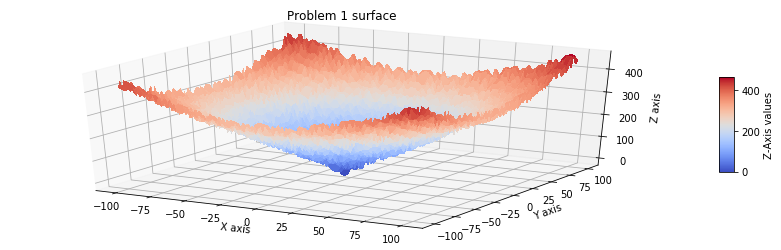

In [6]:
gd = Grid_Search(-100,100,-100,100,100,1)
gd.run()    

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -140.3941410982753


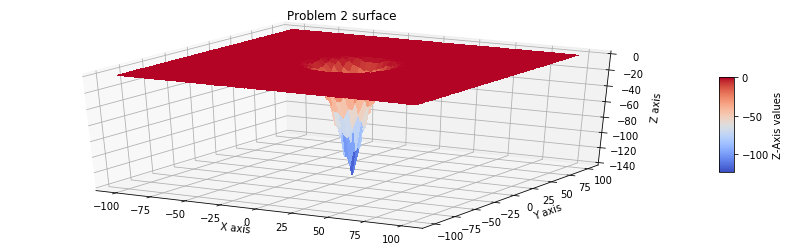

In [7]:
gd = Grid_Search(-100,100,-100,100,100,2)
gd.run()

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -73.6038472650664


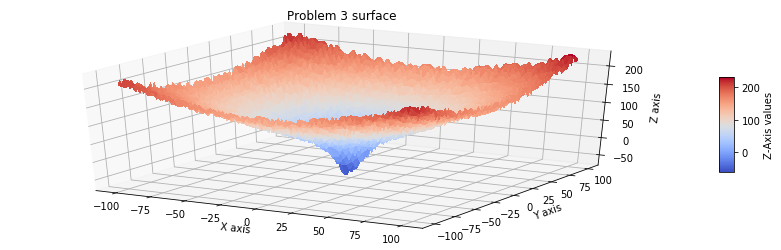

In [8]:
gd = Grid_Search(-100,100,-100,100,100,3)
gd.run()

In [9]:
class Random_Search():
    def __init__(self,x_lower_bound,x_upper_bound,y_lower_bound,y_upper_bound,iteration_time,problem_type):
        self.x_lower_bound = x_lower_bound
        self.x_upper_bound = x_upper_bound
        self.y_lower_bound = y_lower_bound
        self.y_upper_bound = y_upper_bound
        self.iteration_time = iteration_time
        # for problem 1 and problem 2
        self.X = None
        self.Y = None
        # for problem 3 
        self.X1 = None
        self.Y1 = None
        self.X2 = None
        self.Y2 = None
        self.Z= None
        self.problem_type = problem_type # 1:problem_1, 2: problem_2, 3:problem_3
        self.optimal_value = None
        self.optimal_location = None
        
    def generate_random_number(self):
        if self.problem_type == 3:
            self.X1 = (self.x_upper_bound-self.x_lower_bound) * np.random.random_sample() +self.x_lower_bound 
            self.Y1 = (self.y_upper_bound-self.y_lower_bound) * np.random.random_sample() +self.y_lower_bound
            self.X2 = (self.x_upper_bound-self.x_lower_bound) * np.random.random_sample() +self.x_lower_bound 
            self.Y2 = (self.y_upper_bound-self.y_lower_bound) * np.random.random_sample() +self.y_lower_bound
        else:
            self.X = (self.x_upper_bound-self.x_lower_bound) * np.random.random_sample() +self.x_lower_bound 
            self.Y = (self.y_upper_bound-self.y_lower_bound) * np.random.random_sample() +self.y_lower_bound
    
    def evaluate(self):
        if self.problem_type == 1:
            self.Z = problem_1(self.X, self.Y)
        elif self.problem_type == 2:
            self.Z = problem_2(self.X, self.Y)
        elif self.problem_type == 3:
            self.Z = problem_3(self.X1,self.Y1,self.X2,self.Y2)

    
    def update_optimal(self):
        if (self.optimal_value is None) or (self.Z < self.optimal_value): # update if it is optimal 
            self.optimal_value = self.Z
            if self.problem_type == 3:
                self.optimal_location =(self.X1,self.Y1,self.X2,self.Y2)
            else:
                self.optimal_location =(self.X,self.Y)
            
    def run(self):
        iter_num = 0
        print("*****Raodom Search for problem ",self.problem_type)
        print("Start!")
        while(iter_num<self.iteration_time):
            self.generate_random_number()
            self.evaluate()
            self.update_optimal()
            if iter_num % 50000 == 0:
                print("Now at iteration: ",iter_num)
                print("Current optimal value is:", self.optimal_value)
                if self.problem_type == 3:
                    print("Current optimal location (X1,Y1,X2,Y2) is:",self.optimal_location)
                else:
                    print("Current optimal location (X,Y) is:",self.optimal_location)
                print("**************************************************************")
            iter_num += 1;
                
        #finally 
        print("Final iteration: ",self.iteration_time)
        print("Final optimal value is:", self.optimal_value)
        print("Final optimal location (X ,Y) is:",self.optimal_location)
        
    

In [10]:
rd = Random_Search(-100,100,-100,100,50000,1)
rd.run()

*****Raodom Search for problem  1
Start!
Now at iteration:  0
Current optimal value is: 295.7868636042069
Current optimal location (X,Y) is: (-75.5462535185712, -63.287793324244966)
**************************************************************
Final iteration:  50000
Final optimal value is: -20.864260327757957
Final optimal location (X ,Y) is: (-3.0180982996773196, -2.2920281584010667)


In [11]:
rd = Random_Search(-100,100,-100,100,10000,2)
rd.run()

*****Raodom Search for problem  2
Start!
Now at iteration:  0
Current optimal value is: -0.20507006358356902
Current optimal location (X,Y) is: (-70.63771332865095, -4.926974656432677)
**************************************************************
Final iteration:  10000
Final optimal value is: -134.93943791726107
Final optimal location (X ,Y) is: (1.9476038814010082, -1.3551318777896597)


In [12]:
rd = Random_Search(-50,50,-50,50,300000,3)
rd.run()

*****Raodom Search for problem  3
Start!
Now at iteration:  0
Current optimal value is: 31.139047856866185
Current optimal location (X1,Y1,X2,Y2) is: (-24.767043291638867, 11.110182639013921, 19.868665404886386, -34.01583171173739)
**************************************************************
Now at iteration:  50000
Current optimal value is: -60.044246024164444
Current optimal location (X1,Y1,X2,Y2) is: (-2.3824297485282955, 0.1486005834295483, 3.3294625005937135, 0.7377080646646235)
**************************************************************
Now at iteration:  100000
Current optimal value is: -62.87964370334459
Current optimal location (X1,Y1,X2,Y2) is: (0.05668674924849171, -0.776685140100696, 2.9938975616842356, -0.9715314882067361)
**************************************************************
Now at iteration:  150000
Current optimal value is: -67.5561053288703
Current optimal location (X1,Y1,X2,Y2) is: (-2.5173913476634695, -3.223060967093808, -0.12248304037842672, 4.5919833

<h2> Task 2, Particle Swarm Optimization (30): </h2>
<ul>
    
<li>**Task 2a - Explanation and a priori assessment (15)**:<br/>
Explain how Particle Swarm Optimization (PSO) performs search. <br>
What are the algorithms tendencies, tunable parameters, algorithm design choices and modifications you made to increase performance (if any). <br>
Provide an a priori assessment of the expected performance of PSO compared to the other 3 methods. </li>

<li>**Task 2b - Implementation (15)**: <br>
    Implement your PSO in python in the cell below. <br>


</ul>

*placeholder for explanations and a priori assessments of PSO*
*******************************************************************

PSO is a population-based, metaheuristic search algorithm derived from the social behaviour of flocking birds. 

Each particle in the swarm is represented as a vector.The vector translates to a position in the multi-dimensional search space. Each particle also remembers where it's personal best historical position was. For each iteration of the PSO the global best position is found. This is the best personal best position from the swarm. Once the global best position has been found, each particle is moved closer to it's personal best position and the global best position. When executed over many iterations this process produces one good solution to the problem because the particles converge on a near optimal solution.

I think in this problem ,the most important factors are learning factors which are c1 and c2 , I found c1=c2=2 would lead to a good result.The most critical thing in PSO algorihtm is to balance between Exploration and Exploitation abilities,so c1 = c2 =2 is a good trade-off. And In this problem, I did not Set a Vmax, but randomly sample a v from 0~1. 

For algorithm design choice, Since PSO for this problem is not hard to implement, so only one class would be enough.


In [27]:
# placeholder for PSO code
class PSO():  
    def __init__(self,w,c1,c2,r1,r2,pN,dim,max_iter,problem_type,lower_bound,upper_bound):  
        self.w = w    
        self.c1 = c1     
        self.c2 = c2     
        self.r1= r1  
        self.r2= r2  
        self.pN = pN                                # Particle Size 
        self.dim = dim                              # Searching dimension for problem 1 & 2 dim is 2 
                                                    # for problem 3, the searching dimension is 4
            
        self.max_iter = max_iter                    # iteration time 
        self.problem_type = problem_type            # problem_type = 1,2 or 3
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        
    
        self.X = np.zeros((self.pN,self.dim))       #initailize the location and velocity
        self.V = np.zeros((self.pN,self.dim))  
        self.pbest = np.zeros((self.pN,self.dim))   #local best position
        self.gbest = np.zeros((1,self.dim))         #global best position
        self.p_fit = np.zeros(self.pN)              # best fitness value 
        self.fit = 1e10                             #Optimal result (to be defined as a very large number) 
        self.fitness_arr = []                       # To store the optimal value at each iteration 
          
    def eval_fitness(self,x):
        '''
            fitness function 
        '''
        if self.problem_type == 3:
            return problem_3(x[0],x[1],x[2],x[3])
        elif self.problem_type == 2:
            return problem_2(x[0],x[1])
        elif self.problem_type == 1:
            return problem_1(x[0],x[1])
 
    def init_population(self):
        '''
            initilize the population
        '''
        for i in range(self.pN):  
            for j in range(self.dim):  
                self.X[i][j] = (self.upper_bound-self.lower_bound) * np.random.random_sample() +self.lower_bound  
                self.V[i][j] = np.random.random_sample()  #[0,1) 
            self.pbest[i] = self.X[i]  
            tmp = self.eval_fitness(self.X[i])  # compute the fitness 
            self.p_fit[i] = tmp  
            if(tmp < self.fit):  #update the best result
                self.fit = tmp  # optimal solution  
                self.gbest = self.X[i]  # optimal location 
       
    def run(self):
        '''
            The  function to run our PSO
        '''  
        print("PSO START ")
        self.init_population()
        for t in range(self.max_iter):  
            for i in range(self.pN):         # update gbest and pbest  
                temp= self.eval_fitness(self.X[i])  
                if(temp<self.p_fit[i]):      # if it is optimal than the current one,update 
                    self.p_fit[i] = temp  
                    self.pbest[i] = self.X[i]  
                    if(self.p_fit[i] < self.fit):  # update globaal optimal 
                        self.gbest = self.X[i]  
                        self.fit = self.p_fit[i]  
            for i in range(self.pN):  
                self.V[i] = self.w*self.V[i] + self.c1*self.r1*(self.pbest[i] - self.X[i]) + \
                            self.c2*self.r2*(self.gbest - self.X[i])   # compute Velocity
                self.X[i] = self.X[i] + self.V[i]   # Compute location
            self.fitness_arr.append(self.fit)  
            if(t % 100 == 0):#print the local optimal at each iteration 
                print("Now at iteration: ",t)
                print("Current optimal value is:", self.fit)
                if self.problem_type == 3:
                    print("Current optimal location (X1,Y1,X2,Y2) is:", (self.gbest[0], self.gbest[1], self.gbest[2], self.gbest[3]))
                else:
                    print("Current optimal location (X,Y) is:",(self.gbest[0], self.gbest[1]))
                print("**************************************************************")
        
        #--finally--#
        print("The finaly optimal value is : ",self.fit)
        if self.problem_type == 3:
            print("Final optimal location (X1,Y1,X2,Y2) is:", (self.gbest[0], self.gbest[1], self.gbest[2], self.gbest[3]))
        else:
            print("Final optimal location (X,Y) is:",(self.gbest[0], self.gbest[1]))
        print("PSO END ")
                  
    def plot_trace(self):
        plt.figure(1)
        if self.problem_type == 3:
            plt.title("Problem Three")  
        elif self.problem_type == 2:
            plt.title("Problem Two")  
        elif self.problem_type == 1:
            plt.title("Problem One")
            
        plt.xlabel("iterations", size=10)  
        plt.ylabel("Optimal(minimal) value", size=10)  
        t = np.array([t for t in range(self.max_iter)])  
        fitness = np.array(self.fitness_arr)  
        plt.plot(t,fitness, color='b',linewidth=3)  
        plt.show() 

PSO START 
Now at iteration:  0
Current optimal value is: 31.85867598538097
Current optimal location (X,Y) is: (8.431681489546882, 4.33382427435361)
**************************************************************
Now at iteration:  100
Current optimal value is: -23.610552821161374
Current optimal location (X,Y) is: (-3.1362806028516403, -3.151939683053188)
**************************************************************
Now at iteration:  200
Current optimal value is: -23.611110799469042
Current optimal location (X,Y) is: (-3.141593633527268, -3.141592607889431)
**************************************************************
The finaly optimal value is :  -23.6111111110972
Final optimal location (X,Y) is: (-3.1415926535877525, -3.1415926536620318)
PSO END 


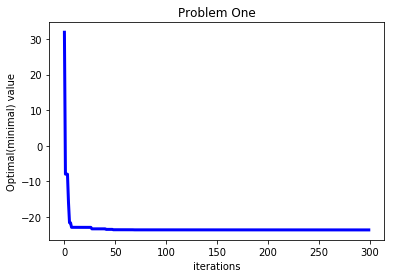

In [28]:
my_pso = PSO(w=0.8,c1=2,c2=2,r1=0.6,r2=0.3,pN=100,dim=2,max_iter=300,problem_type=1,lower_bound=-100,upper_bound=100)  
my_pso.run()
my_pso.plot_trace()

PSO START 
Now at iteration:  0
Current optimal value is: -96.11895502644605
Current optimal location (X,Y) is: (2.030947647038987, -5.162683892068198)
**************************************************************
Now at iteration:  100
Current optimal value is: -149.8852785505695
Current optimal location (X,Y) is: (0.06395102922504688, -0.5944016338192567)
**************************************************************
Now at iteration:  200
Current optimal value is: -149.95246276217884
Current optimal location (X,Y) is: (-0.07988886992618767, -0.48644218612478346)
**************************************************************
The finaly optimal value is :  -149.95246276217884
Final optimal location (X,Y) is: (-0.07988905676458205, -0.4864423925536435)
PSO END 


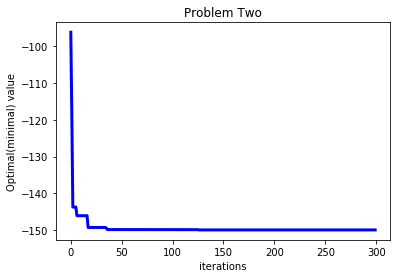

In [96]:
my_pso = PSO(w=0.8,c1=2,c2=2,r1=0.6,r2=0.3,pN=100,dim=2,max_iter=300,problem_type=2,lower_bound=-100,upper_bound=100)  
my_pso.run()
my_pso.plot_trace()

PSO START 
Now at iteration:  0
Current optimal value is: 4.169599108761754
Current optimal location (X1,Y1,X2,Y2) is: (3.9592381678598314, -8.247847662377207, 58.08573462813468, -11.93287511300106)
**************************************************************
Now at iteration:  100
Current optimal value is: -86.49428674969363
Current optimal location (X1,Y1,X2,Y2) is: (-3.290679156613779, -3.1952662926011812, 0.035475583307163445, 0.4700026594703092)
**************************************************************
Now at iteration:  200
Current optimal value is: -86.56521165307876
Current optimal location (X1,Y1,X2,Y2) is: (-3.267435056639263, -3.175190066474356, 0.16943015920611046, 0.1658009611143271)
**************************************************************
Now at iteration:  300
Current optimal value is: -86.59110125137688
Current optimal location (X1,Y1,X2,Y2) is: (-3.2380215684635165, -3.1863101957204343, 0.06338548192459298, 0.3047812971920086)
*****************************

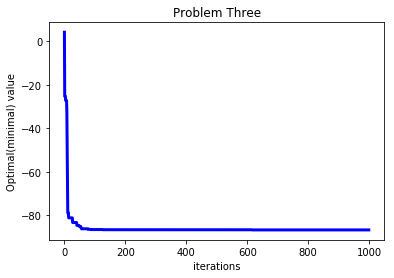

In [97]:
my_pso = PSO(w=0.8,c1=2,c2=2,r1=0.6,r2=0.3,pN=100,dim=4,max_iter=1000,problem_type=3,lower_bound=-100,upper_bound=100)  
my_pso.run()
my_pso.plot_trace()

<h2> Task 3, Your Nominated Algorithm (30): </h2>
<ul>
    
<li>**Task 3a - Explanation and a priori assessment (15)**:<br/>
    Nominate (choose or design) an meta heuristic search algorithm. <br>
    Explain how your nominated algorithm performs search. <br>
    What are the algorithms tendencies, tunable parameters, algorithm design choices and modifications you made to increase performance (if any). <br>
Provide an a priori assessment of the expected performance compared to the other 3 methods. </li>

<li>**Task 3b - Implementation**: <br>
    Implement your algorithm in python in the cell below. <br>


</ul>

*placeholder for explanations and a priori assessments of your nominated algorithm*
### Simulate Anneal
Simulated Annealing is a probabilistic optimization technique used for finding an approximate solution to an optimization problem.The strength of SA algorithm is that it avoids getting caught at local maxima.The mechanism of SA algorithm really helps that. This is a paramter that ususally called temperature which can control the convergence of SA algorithm. When the temperature  is high, the SA algorithm will accept solutions that are worse solutions than our current solution with some probabilities. This allow the algorithm to move around quickly, maybe jumping out of any local optimums in early iterationsAs the temperature goes down, the chance of accepting worse solutions will be unlikely allowed. This will lead the algorithm to global optimum solution.

The whole procedure to impelement the SA algorithm is as follows:
1. we need set the initial temperature and create a random initial position.
2. while our stop condition is not met. <br>
      2.1 select a neighbour by making a small change to our current solution.(with given distribution)<br>
      2.2 decide whether to move to that neighbour solution with acceptance probability p=exp(Δh/Ti),<br>
      2.3 decrease the temperature and continue looping<br>
      
The tune paramters here are the Markov_chain length, step factor for decreasing the temperature and the initial/terminal  temperature.The step factor would be the critical one, it cannot be so small otherwise the algorithm must be too slow. 


The efficiency of SA algorithm is not as efficient as the PSO algorithm , but it could have a good performance.



In [29]:
from random import random
import math
import sys
import numpy as np

class SimAnneal(object):
    '''
    Entity Class for 
    Simulated annealing algorithm 
    '''

    def new_var(self, oldList, T):
        '''
        :old : list
        :return : list, new solutions based on old solutions
        :T   : current temperature
        '''
        newList = [i + (random()*2-1) for i in oldList]
        return newList

    def juge(self, func, new, old, T):
        '''
        matropolise conditions: to get the maximun or minmun
        new : new solution data from self.newX
        old : old solution data
        T   : current temperature

        '''
        dE = func(old) - func(new)
        if dE >= 0:
            x, ans = new, func(new)
        else:
            if math.exp(dE/T) > random():
                x, ans = new, func(new)
            else:
                x, ans = old, func(old)
        return [x, ans]

class OptSolution(object):
    '''
    Driver Class for Simulated annealing algorithm 
    find the optimal solution.

    '''
    def __init__(self, temperature0=100, temDelta=0.98,
                 temFinal=1e-5, Markov_chain=2000, 
                 result=0, val_nd=[0]):
        # initial temperature
        self.temperature0 = temperature0
        # step factor for decreasing temperature
        self.temDelta = temDelta
        # the final temperature
        self.temFinal = temFinal
        # the Markov_chain length (inner loops numbers)
        self.Markov_chain = Markov_chain
        # the final result
        self.result = result
        # the initial coordidate values: 1D [0], 2D [0,0] ...
        self.val_nd = val_nd

    # create unifrom distributed x,y ..., depend on value range
    def mapRange(self, oneDrange):
        return (oneDrange[1]-oneDrange[0])*random() + oneDrange[0]

    def soulution(self, SA_newV, SA_juge,ValueRange, func):
        '''
        calculate the extreme value: max or min value
        :SA_newV : function from class SimAnneal().newVar
        :SA_juge : function from class SimAnneal().juge_*
        :ValueRange : [[],], range of variables, 1D or 2D or 3D...
        :func : target function obtained from user

        '''
        Ti = self.temperature0
        ndim = len(ValueRange)
        loops = 0
        iteration = 0
        print("Simulate Anneal Start")
        while Ti > self.temFinal:
            res_temp = []
            preV = [[self.mapRange(ValueRange[j]) for i in range(self.Markov_chain)] for j in range(ndim)]
            newV = [ SA_newV(preV[j], T=Ti) for j in range(ndim)]

            for i in range(self.Markov_chain):
                boolV = True
                for j in range(ndim):
                    boolV &= (ValueRange[j][0]<= newV[j][i] <= ValueRange[j][1])
                if boolV == True:
                    res_temp.append(SA_juge(new=[newV[k][i] for k in range(ndim)], 
                                    func=func, old=[preV[k][i] for k in range(ndim)], 
                                    T=Ti))
                else:
                    continue
                loops += 1
            
            
            
            # change list to numpy.array
            sol_temp = np.array(res_temp)
            # find the extreme value
            extreme_temp = np.amin(sol_temp[:, 1])
            # find the row No. and column No. of the extreme value
            re = np.where(sol_temp == extreme_temp)

            result_temp = min(self.result, extreme_temp)
            # update the cooordidate of current extrema value 
            self.val_nd = self.val_nd if result_temp == self.result else sol_temp[re[0][0], 0]
            # update the extreme value
            self.result = result_temp
            # update the current temperature
            Ti = Ti* self.temDelta
            if(iteration % 200 ==0):
                print("Now at loops: ", loops)
                print("Now at iteration: ", iteration)
                print("Current optimal value is:", self.result)
                if(len(self.val_nd) == 2):
                    print("Current optimal location (X,Y) is:",(self.val_nd[0], self.val_nd[1]))
                elif (len(self.val_nd) ==4):
                    print("Current optimal location (X1,Y1,X2,Y2) is:", (self.val_nd[0], self.val_nd[1],self.val_nd[2],self.val_nd[3]))
                print("*********************************************")    
            
            iteration +=1
        
        print("Final Result:",self.result)
        if(len(self.val_nd) == 2):
            print("Final optimal location (X,Y) is:",(self.val_nd[0], self.val_nd[1]))
        elif (len(self.val_nd) ==4):
            print("Final optimal location (X1,Y1,X2,Y2) is:", (self.val_nd[0], self.val_nd[1],self.val_nd[2],self.val_nd[3]))
        print('Total loops = %d' %loops)
        print('Total iterations = %d' %iteration)
        print("Simulate Anneal End")

In [30]:
def func_problem_1(w):
    x,y=w[0],w[1]
    return problem_1(x,y)
targ = SimAnneal()
init = 1e10   # for minimun case
xyRange = [[-100, 100], [-100, 100]] # define the range 
x_init =  (xyRange[0][1]-xyRange[0][0])*np.random.random_sample()+xyRange[0][0]
y_init = (xyRange[1][1]-xyRange[1][0])*np.random.random_sample()+xyRange[1][0]
calculate = OptSolution(Markov_chain=300, result=init, val_nd=[x_init,y_init])
output = calculate.soulution(SA_newV=targ.new_var, SA_juge=targ.juge, 
                             ValueRange=xyRange, func=func_problem_1)

Simulate Anneal Start
Now at loops:  299
Now at iteration:  0
Current optimal value is: -6.376380433782678
Current optimal location (X,Y) is: (-0.1839939072243253, -1.327814461887967)
*********************************************
Now at loops:  60005
Now at iteration:  200
Current optimal value is: -22.31769015174134
Current optimal location (X,Y) is: (-2.9280732690855693, -3.4930046666621237)
*********************************************
Now at loops:  119739
Now at iteration:  400
Current optimal value is: -22.633031929603455
Current optimal location (X,Y) is: (-2.964654532491892, -3.3975705006973325)
*********************************************
Now at loops:  179454
Now at iteration:  600
Current optimal value is: -23.479714256254393
Current optimal location (X,Y) is: (-3.1817219876269434, -3.1298047342646953)
*********************************************
Final Result: -23.479714256254393
Final optimal location (X,Y) is: (-3.1817219876269434, -3.1298047342646953)
Total loops = 2382

In [16]:
def func_problem_2(w):
    x,y=w[0],w[1]
    return problem_2(x,y)
targ = SimAnneal()
init = 1e10   # for minimun case
xyRange = [[-100, 100], [-100, 100]] # define the range 
x_init =  (xyRange[0][1]-xyRange[0][0])*np.random.random_sample()+xyRange[0][0]
y_init = (xyRange[1][1]-xyRange[1][0])*np.random.random_sample()+xyRange[1][0]
calculate = OptSolution(Markov_chain=300, result=init, val_nd=[x_init,y_init])
output = calculate.soulution(SA_newV=targ.new_var, SA_juge=targ.juge, 
                             ValueRange=xyRange, func=func_problem_2)

Simulate Anneal Start
Now at loops:  297
Now at iteration:  0
Current optimal value is: -77.59835110158605
Current optimal location (X,Y) is: (6.874111850780588, 3.870628026853808)
*********************************************
Now at loops:  60012
Now at iteration:  200
Current optimal value is: -143.41671070750184
Current optimal location (X,Y) is: (0.5622433780895477, 0.41570550032396625)
*********************************************
Now at loops:  119714
Now at iteration:  400
Current optimal value is: -145.5257677012643
Current optimal location (X,Y) is: (-0.10077404672973955, -0.3352251930075454)
*********************************************
Now at loops:  179436
Now at iteration:  600
Current optimal value is: -147.70242695247956
Current optimal location (X,Y) is: (-0.44558629795221316, -0.46401759291477385)
*********************************************
Final Result: -147.70242695247956
Final optimal location (X,Y) is: (-0.44558629795221316, -0.46401759291477385)
Total loops = 23

In [161]:
def func_problem_3(w):
    '''
    Input parameter w is a list 
    '''
    x1,y1,x2,y2=w[0],w[1],w[2],w[3]
    return problem_3(x1,y1,x2,y2)
targ = SimAnneal()
init = 1e10   # for minimun case
xyRange = [[-50, 50], [-50, 50],[-50,50],[-50,50]] # define the range 
x_init =  (xyRange[0][1]-xyRange[0][0])*np.random.random_sample()+xyRange[0][0]
y_init = (xyRange[1][1]-xyRange[1][0])*np.random.random_sample()+xyRange[1][0]
calculate = OptSolution(Markov_chain=300, result=init, val_nd=[x_init,y_init,x_init,y_init])
output = calculate.soulution(SA_newV=targ.new_var, SA_juge=targ.juge, 
                             ValueRange=xyRange, func=func_problem_3)

Simulate Anneal Start
Now at loops:  291
Now at iteration:  0
Current optimal value is: -10.243586575612127
Current optimal location (X1,Y1,X2,Y2) is: (-2.323694332293451, -3.6985040535401996, -47.96272694068971, -2.1698029427546768)
*********************************************
Now at loops:  59130
Now at iteration:  200
Current optimal value is: -74.28211704058205
Current optimal location (X1,Y1,X2,Y2) is: (-1.910976285887881, -3.198612768604174, -2.0711518811658656, -1.9060688101587684)
*********************************************
Now at loops:  117937
Now at iteration:  400
Current optimal value is: -74.28211704058205
Current optimal location (X1,Y1,X2,Y2) is: (-1.910976285887881, -3.198612768604174, -2.0711518811658656, -1.9060688101587684)
*********************************************
Now at loops:  176709
Now at iteration:  600
Current optimal value is: -74.70278832959218
Current optimal location (X1,Y1,X2,Y2) is: (-3.2140746737987627, -2.9477540357440546, -0.09085792736291154,

<h2> Task 4, Comparison (20): </h2>
<ul>
	Run all four tuned algorithms on several (read, 5 or more) seeds of the problems. <br>
    Compare the algorithms performance in terms of runtime, iteration efficiency, convergence stability, ease of implementation, necessary amount of a priori knowledge and other factors that you consider important. <br>


</ul>

In [17]:
# placeholder for the algorithm calls, time measurments, etc...

### For Random Search

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -23.11663808393204


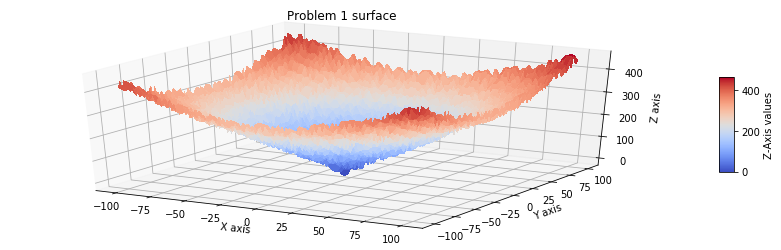

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -23.11663808393204


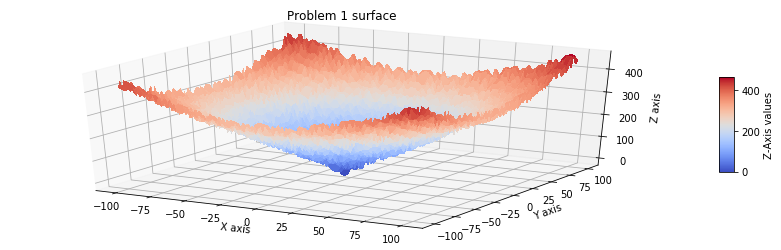

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -23.11663808393204


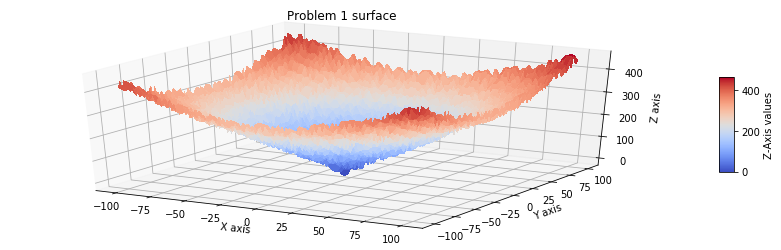

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -23.11663808393204


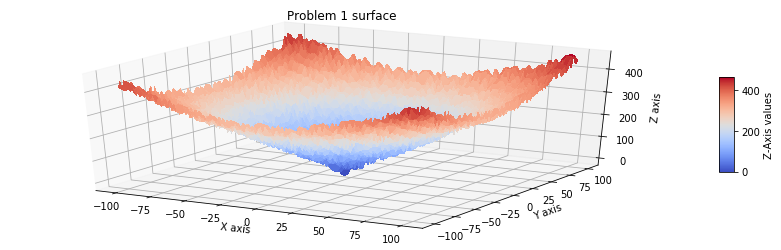

Queried with 4 matrices of shape (100, 100) (100, 100) it returns a matrix of shape: (100, 100)
Optimal value:  -23.11663808393204


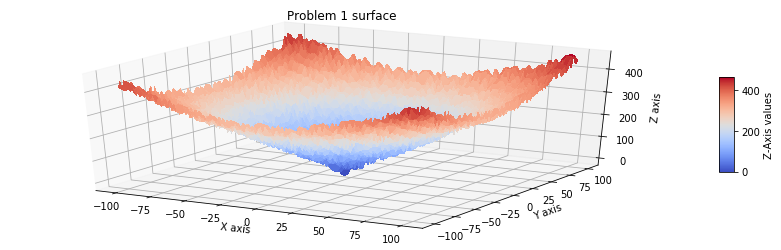

Wall time: 6.21 s


In [19]:
%%time
for idx in range(5):
    random.seed(idx)
    gd = Grid_Search(-100,100,-100,100,100,1)
    gd.run()    

#### FOR random Search 

In [25]:
%%time
avg_opt = 0;
for idx in range(5):
    random.seed(idx)
    rd = Random_Search(-100,100,-100,100,50000,1)
    rd.run()
    avg_opt += rd.optimal_value
    print("*****************NEXT Iteration ******************************")
print ("Average Optimal PSO  reuslt :",avg_opt/5)

*****Raodom Search for problem  1
Start!
Now at iteration:  0
Current optimal value is: 289.3035944819481
Current optimal location (X,Y) is: (-26.506965392235358, -99.49095254934532)
**************************************************************
Final iteration:  50000
Final optimal value is: -21.474900967791708
Final optimal location (X ,Y) is: (-3.5820864494215954, -3.6556180000237646)
*****************NEXT Iteration ******************************
*****Raodom Search for problem  1
Start!
Now at iteration:  0
Current optimal value is: 277.5120117018192
Current optimal location (X,Y) is: (64.3961759311791, 57.79311983321631)
**************************************************************
Final iteration:  50000
Final optimal value is: -21.66976236068775
Final optimal location (X ,Y) is: (-2.554064208578083, -2.959661773526861)
*****************NEXT Iteration ******************************
*****Raodom Search for problem  1
Start!
Now at iteration:  0
Current optimal value is: 316.3706606

### For PSO

In [23]:
%%time
avg_opt = 0;
for idx in range(5):
    random.seed(idx)
    my_pso = PSO(w=0.8,c1=2,c2=2,r1=0.6,r2=0.3,pN=100,dim=2,max_iter=300,problem_type=1,lower_bound=-100,upper_bound=100)  
    my_pso.run()
    avg_opt += my_pso.fit;
    print("*****************NEXT Iteration ******************************")
print ("Average Optimal PSO  reuslt :",avg_opt/5)

PSO START 
Now at iteration:  0
Current optimal value is: 14.67599719745793
Current optimal location (X,Y) is: (1.6209061518739705, -2.203120541291748)
**************************************************************
Now at iteration:  100
Current optimal value is: -23.608536577029952
Current optimal location (X,Y) is: (-3.1369030342807522, -3.1404977017319102)
**************************************************************
Now at iteration:  200
Current optimal value is: -23.611110933276354
Current optimal location (X,Y) is: (-3.1415962118813714, -3.141589980072813)
**************************************************************
The finaly optimal value is :  -23.611111110864687
Final optimal location (X,Y) is: (-3.141592656152858, -3.141592651559441)
PSO END 
*****************NEXT Iteration ******************************
PSO START 
Now at iteration:  0
Current optimal value is: 59.000357625021444
Current optimal location (X,Y) is: (7.639350313458773, 13.515030917205802)
*****************

### For Simulate Anneal

In [36]:
%%time
avg_opt = 0;
for idx in range(5):
    np.random.seed(idx)
    x_init =  (xyRange[0][1]-xyRange[0][0])*np.random.random_sample()+xyRange[0][0]
    y_init = (xyRange[1][1]-xyRange[1][0])*np.random.random_sample()+xyRange[1][0]
    calculate = OptSolution(Markov_chain=300, result=init, val_nd=[x_init,y_init])
    output = calculate.soulution(SA_newV=targ.new_var, SA_juge=targ.juge, 
                                 ValueRange=xyRange, func=func_problem_1)
    avg_opt += calculate.result;
    print("*****************NEXT Iteration ******************************")
print ("Average Optimal PSO  reuslt :",avg_opt/5)

Simulate Anneal Start
Now at loops:  299
Now at iteration:  0
Current optimal value is: 15.369124894987504
Current optimal location (X,Y) is: (-7.388907578160688, -6.483840953945744)
*********************************************
Now at loops:  60020
Now at iteration:  200
Current optimal value is: -22.64671230022482
Current optimal location (X,Y) is: (-3.0677937416180128, -3.439320377111632)
*********************************************
Now at loops:  119732
Now at iteration:  400
Current optimal value is: -22.974878481022962
Current optimal location (X,Y) is: (-2.965943639174167, -3.040841067648758)
*********************************************
Now at loops:  179411
Now at iteration:  600
Current optimal value is: -22.974878481022962
Current optimal location (X,Y) is: (-2.965943639174167, -3.040841067648758)
*********************************************
Final Result: -22.974878481022962
Final optimal location (X,Y) is: (-2.965943639174167, -3.040841067648758)
Total loops = 238203
Tota

*placeholder for your comparison study's findings*
*******************************************************************************************************************
For running Time, The Most time-consuming algorithm is  Simulate Anneal algorithm ,which is the less efficient one.However the performance and statbility is pretty good. PSO has a larger converange rate than SA algorithm. Among all the implementation,PSO achieves the best performance.The most complicated implementation is SA algorithm.

<h2> Bonus – what if… (20): </h2>
<ul>
If the provided problems were of a categorical nature, for example the TSP from assignment 2, how would that have impacted your own Algorithm choice? <br>
How do you think the other 3 algorithms would have performed on a such a problem. What different hyper-parameter choices and algorithm modifications would have been necessary? <br>
</ul>

*Gedankenexperiment here*

####  For TSP problem, PSO is not  directly used for this type of problem. TSP is discrete combination optimization problem .So, if I would try to implement PSO on TSP problem. I will make some modification by defining swap operation rules. And the velocity of a parcle is a sequence of swap operators. I think the PSO implementation may have the best perfomance.